The primary focus of this project was to examine statistical regression problems in R, with a particular emphasis on utilizing prediction, logarithms, the Chow test, and confidence intervals to validate our models. Through these techniques, we gained a deeper understanding of the importance of selecting appropriate models and assessing their validity, which is crucial for generating accurate and reliable predictions. Overall, this project provided valuable hands-on experience in regression analysis in R and deepened our understanding of the fundamental concepts underlying statistical modeling.

# Problem 1

## a. Test the following hypotheses:

### I. The expected delay at a traffic signal is 1.8 minutes and the expected delay foreach car in front of him at his parking lot is 3.2 mins

In [ ]:
travel <- read.csv("/content/OfficeTravel.csv")


In [ ]:
print(head(travel, n = 15))

   time leave signals cars
1    40    33       8    0
2    26    11       8    1
3    40    16       6    1
4    48    37       3    1
5    47    16       6    1
6    54    21      13    1
7    29    15       4    0
8    52    29       9    0
9    59    46       7    0
10   47    26       7    0
11   34    20       3    1
12   35    32      11    0
13   36    14       7    0
14   48    20       9    0
15   42    16       7    0


In [ ]:
model <- lm(formula = time ~ leave + signals + cars, data = travel)

In [ ]:
summary(model)


Call:
lm(formula = time ~ leave + signals + cars, data = travel)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.2789  -3.9749  -0.1479   4.6265  16.5152 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 21.04286    1.74652  12.048  < 2e-16 ***
leave        0.36841    0.03618  10.181  < 2e-16 ***
signals      1.49946    0.19334   7.756 2.66e-13 ***
cars         2.97648    0.65026   4.577 7.63e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.365 on 235 degrees of freedom
Multiple R-squared:  0.5285,	Adjusted R-squared:  0.5224 
F-statistic: 87.79 on 3 and 235 DF,  p-value: < 2.2e-16


For this Sample:
Signal = 1.5 and Cars = 2.98

The hypothesis is that (for population):
Signal = 1.8 and Cars = 3.2

As we can see below, it is between the confidence interval for 95% and 99%. So we do not regect the null hypothesis.

In [ ]:
confint(model, level = 0.95)

,2.5 %,97.5 %
(Intercept),17.6020221,24.4836897
leave,0.2971201,0.4396959
signals,1.1185658,1.8803523
cars,1.6954077,4.2575560


In [ ]:
confint(model, level = 0.99)

,0.5 %,99.5 %
(Intercept),16.5073014,25.5784104
leave,0.2744394,0.4623766
signals,0.9973825,2.0015356
cars,1.2878268,4.6651369


In [ ]:
cor(travel$leave, travel$cars)

[1] 0.4791693

In [ ]:
cor(travel$leave, log(travel$cars))

[1] NaN

In [ ]:
library(ggplot2)

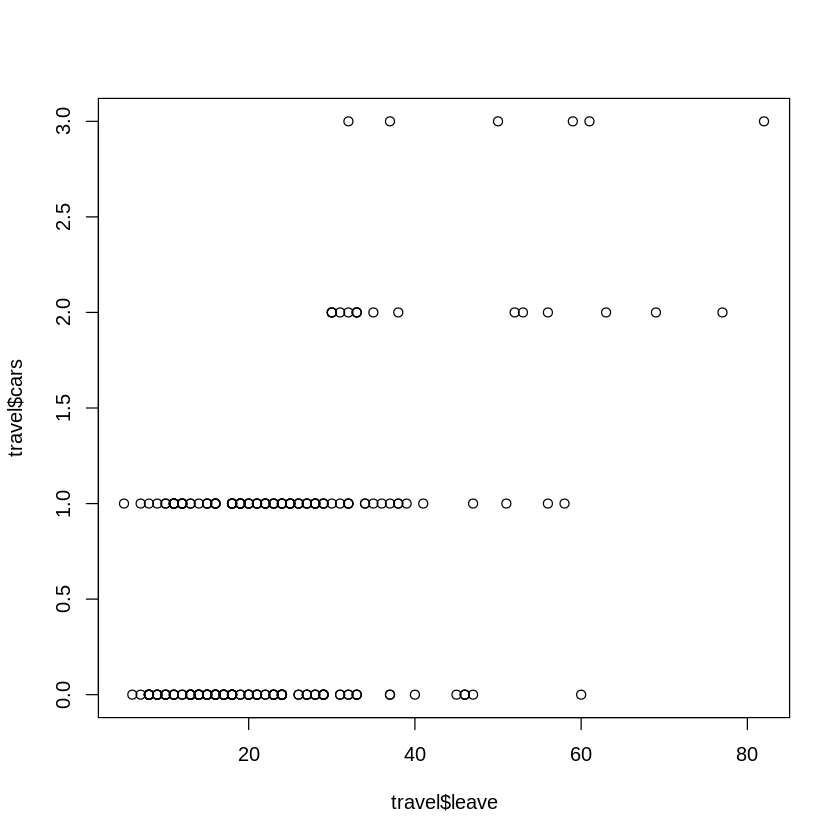

In [ ]:
plot(travel$leave, travel$cars)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


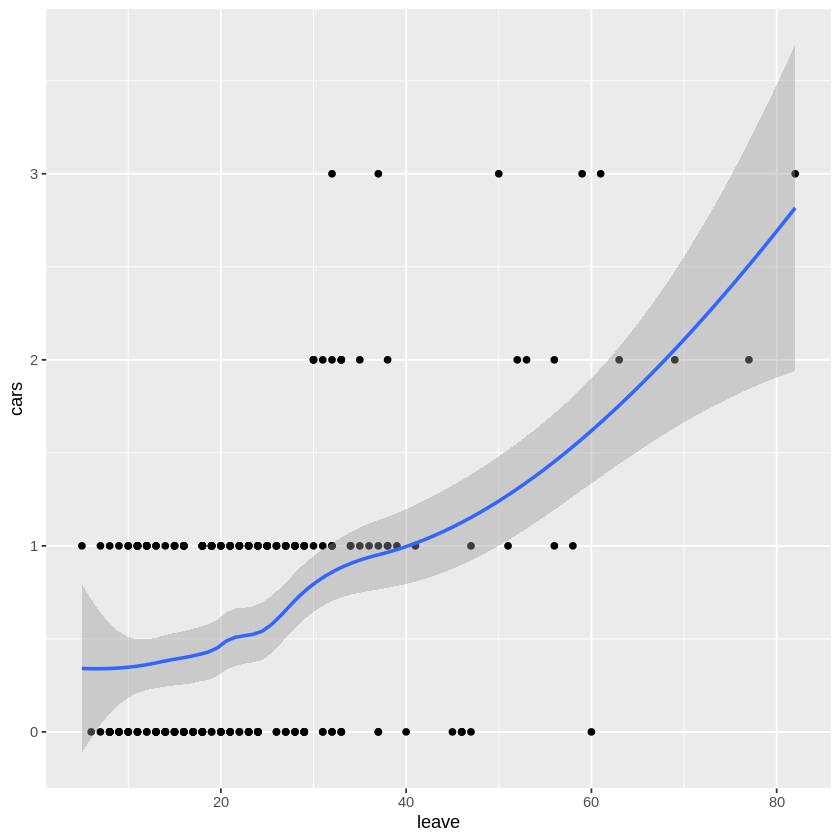

In [ ]:
ggplot(travel, aes(leave, cars)) +geom_point() + geom_smooth()

# Problem 2

**(a)Compute summary statistics on the dataset and comment. In particular, construct a histogram of price.** 

In [ ]:
house <- read.csv("/content/houseprice.csv")

In [ ]:
summary(house)

     price              sqft         bedrooms         baths      
 Min.   :  22000   Min.   : 662   Min.   :1.000   Min.   :1.000  
 1st Qu.: 100000   1st Qu.:1611   1st Qu.:3.000   1st Qu.:2.000  
 Median : 132000   Median :2200   Median :3.000   Median :2.000  
 Mean   : 157937   Mean   :2343   Mean   :3.194   Mean   :1.982  
 3rd Qu.: 175000   3rd Qu.:2824   3rd Qu.:4.000   3rd Qu.:2.000  
 Max.   :1580000   Max.   :7897   Max.   :8.000   Max.   :5.000  
      age           owner           ranch         fireplace        mountain    
 Min.   : 1.0   Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.: 2.0   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000  
 Median :18.0   Median :0.000   Median :1.000   Median :1.000   Median :0.000  
 Mean   :18.8   Mean   :0.489   Mean   :0.502   Mean   :0.571   Mean   :0.077  
 3rd Qu.:25.0   3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:0.000  
 Max.   :80.0   Max.   :1.000   Max.   :1.000   Max.   :1.

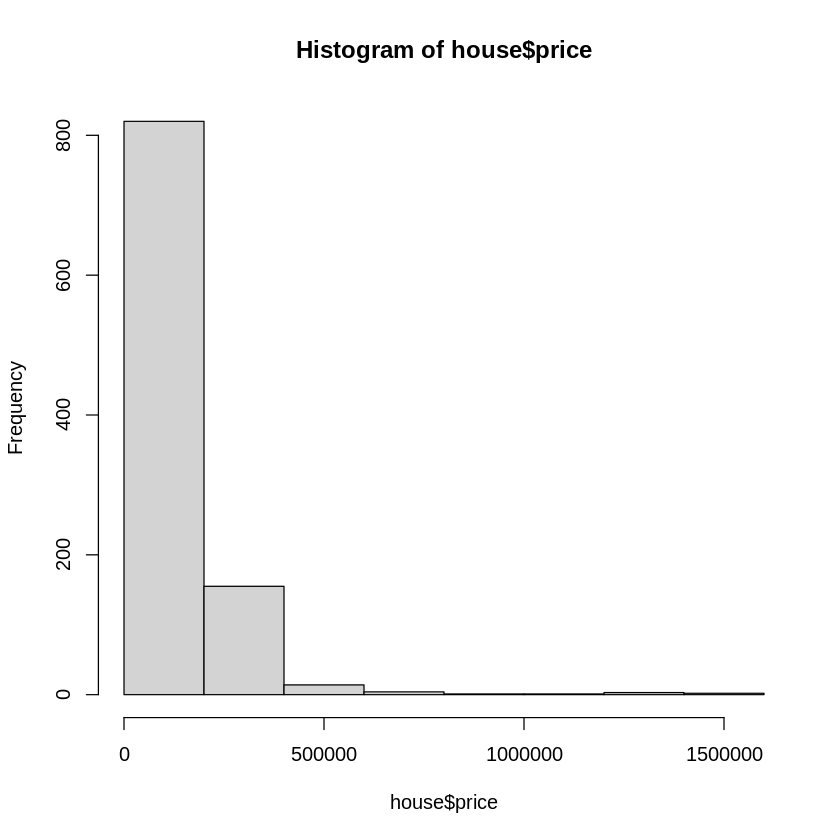

In [ ]:
hist(house$price)

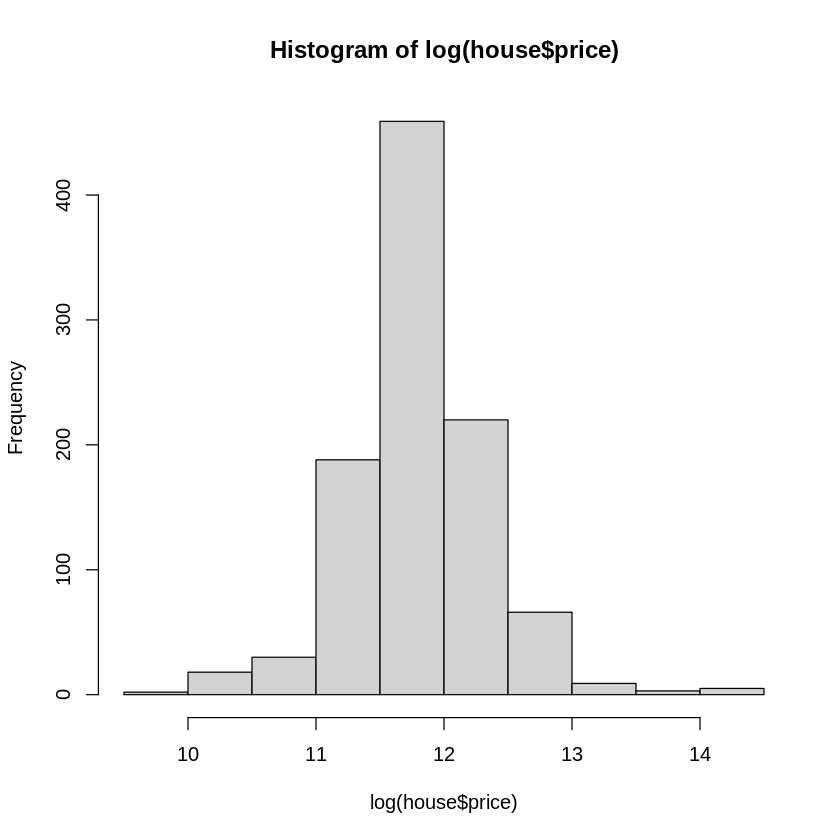

In [ ]:
hist(log(house$price))

b

**Divide the variable sqft by 100 prior to estimation.**

In [ ]:
house$sqft <- house$sqft/100

**Estimate a regression model explaining ln(price/1000) as a function of the remainingvariables.**

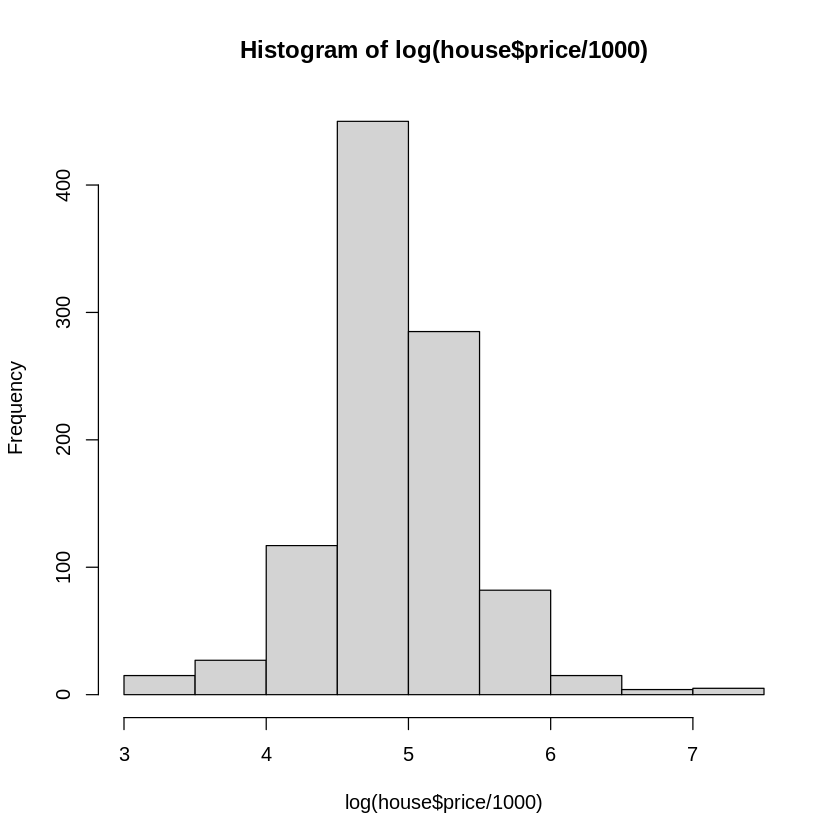

In [ ]:
hist(log(house$price/1000))

In [ ]:
l_house = log(house$price/1000)


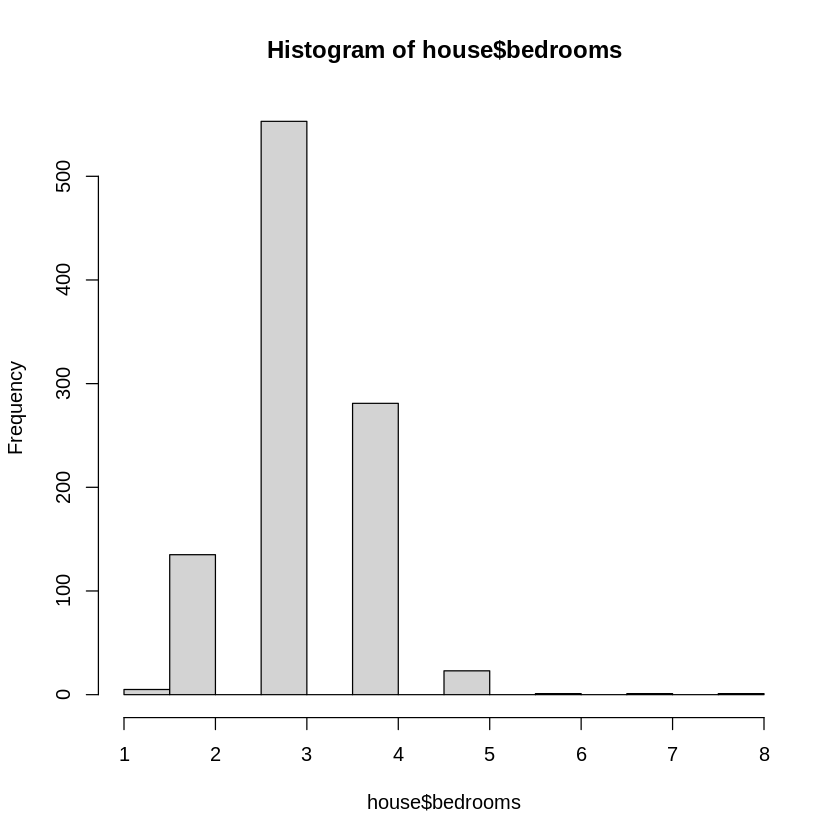

In [ ]:
hist(house$bedrooms)

In [ ]:
model_2 <- lm( l_house ~ sqft + bedrooms + baths + age + owner + ranch + fireplace + mountain, data = house)

In [ ]:
summary(model_2)


Call:
lm(formula = l_house ~ sqft + bedrooms + baths + age + owner + 
    ranch + fireplace + mountain, data = house)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.13710 -0.12511  0.00234  0.15326  0.92602 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.9916745  0.0465712  85.711  < 2e-16 ***
sqft         3.0444601  0.1442164  21.110  < 2e-16 ***
bedrooms    -0.0348125  0.0170065  -2.047 0.040920 *  
baths        0.1865623  0.0214078   8.715  < 2e-16 ***
age         -0.0063169  0.0005383 -11.736  < 2e-16 ***
owner        0.0654202  0.0187105   3.496 0.000492 ***
ranch       -0.0550476  0.0178456  -3.085 0.002094 ** 
fireplace    0.0777968  0.0200351   3.883 0.000110 ***
mountain     0.1125821  0.0339656   3.315 0.000951 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2722 on 991 degrees of freedom
Multiple R-squared:  0.7419,	Adjusted R-squared:  0.7398 
F-statistic: 356.1 on 8 and 

There is features that are not significative. We will skipt them from our model.

In [ ]:
model_3 <- lm( l_house ~ sqft + bedrooms + baths + age +  ranch +  mountain, data = house)

In [ ]:
summary(model_3)


Call:
lm(formula = l_house ~ sqft + bedrooms + baths + age + ranch + 
    mountain, data = house)

Residuals:
    Min      1Q  Median      3Q     Max 
-3296.7  -297.6   -39.3   269.0  8754.6 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -245.269    129.019  -1.901 0.057587 .  
sqft        8634.656    393.140  21.963  < 2e-16 ***
bedrooms    -263.147     47.303  -5.563 3.41e-08 ***
baths        386.136     59.174   6.525 1.08e-10 ***
age           -4.282      1.476  -2.901 0.003800 ** 
ranch       -165.340     49.455  -3.343 0.000859 ***
mountain     520.615     94.758   5.494 4.99e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 759.5 on 993 degrees of freedom
Multiple R-squared:  0.6431,	Adjusted R-squared:  0.6409 
F-statistic: 298.2 on 6 and 993 DF,  p-value: < 2.2e-16


**(c)Create a variable that is the product of mountain and ranch. Add this variable to the modeland re-estimate. What is the effect of adding this variable?**

This variavel mr means mountain and/or ranch, because it will be 1 if it is mountain or ranch or both. We will skipt the variables "mountain" and "ranch" because of the covariance between them.

In [ ]:
mr <- house$mountain * house$ranch

In [ ]:
model_4 <- lm( l_house ~ sqft + bedrooms + baths + age + owner +  fireplace + mr, data = house)

In [ ]:
summary(model_4)


Call:
lm(formula = l_house ~ sqft + bedrooms + baths + age + owner + 
    fireplace + mr, data = house)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.15469 -0.12709 -0.00716  0.15011  1.08552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.9887530  0.0469674  84.926  < 2e-16 ***
sqft         3.1529674  0.1447592  21.781  < 2e-16 ***
bedrooms    -0.0524737  0.0167696  -3.129  0.00180 ** 
baths        0.1942130  0.0215564   9.010  < 2e-16 ***
age         -0.0064468  0.0005398 -11.943  < 2e-16 ***
owner        0.0613101  0.0188892   3.246  0.00121 ** 
fireplace    0.0868925  0.0201288   4.317 1.74e-05 ***
mr          -0.0419124  0.0591538  -0.709  0.47878    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2751 on 992 degrees of freedom
Multiple R-squared:  0.7361,	Adjusted R-squared:  0.7342 
F-statistic: 395.2 on 7 and 992 DF,  p-value: < 2.2e-16


The new variable is no longer significative.

**(d)It is arguable that the ranch-style homes may have a different regression function from thediverse set of other styles possible. Carry out a Chowtest of the equivalence of the regressionmodels for ranch versus non-ranch styles. What do you conclude?**

In [ ]:

install.packages("strucchange")
library(strucchange)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘sandwich’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich



In [ ]:
sctest(l_house ~ house$ranch, type = "Chow")


	Chow test

data:  l_house ~ house$ranch
F = 1.1145, p-value = 0.3285


As the test shows a break, we conclude that ranch-style homes may have a different function.

**(e)Using the equation estimated in part (d), predict the value of a ranch-style house with 2500square feet of area, that is 20 years old, that is owner-occupied at the time of sale, that has afireplace, 3 bedrooms, and 2 baths, and that is not on a mountain.**

In [ ]:
ranch_houses <- subset(house, ranch == 1)

In [ ]:
l_house_ranch

[1] 4.197202 4.189655 4.226834 4.624973 3.988984 4.962845 4.594109 4.588533
  [9] 4.593573 4.594109 4.618215 4.828314 4.135167 4.521789 4.787492 3.135494
 [17] 3.120336 4.553877 4.172848 4.317488 4.219508 3.135494 3.691401 4.532599
 [25] 4.069027 4.639572 4.630497 4.583947 4.595120 4.406719 5.144583 4.911919
 [33] 4.382039 4.912655 5.120983 4.897840 5.598422 5.752573 5.332719 5.285739
 [41] 5.814131 5.389072 5.246498 4.380776 4.815431 4.812184 4.871373 4.852030
 [49] 4.219508 4.127134 4.820282 3.912023 4.498698 4.828314 4.990433 5.505332
 [57] 4.330733 4.905275 4.442651 4.827513 4.594109 4.787492 4.897840 4.749227
 [65] 4.405499 3.526361 4.516339 4.693181 3.737670 4.700480 4.955827 4.380776
 [73] 4.904534 4.867534 4.828314 4.682131 4.890349 4.836282 4.803201 4.753590
 [81] 4.905275 5.010635 4.915592 4.579852 4.948760 5.220356 4.844187 5.669881
 [89] 4.561218 4.940928 4.579852 4.509760 4.283587 4.923624 4.753590 4.799914
 [97] 5.009968 4.595120 4.605170 5.337538 4.867534 4.629863 5.247024 4.782479
[105] 5.358942 5.572154 4.828314 4.828314 5.330300 4.766438 5.164786 5.260096
[113] 4.717606 5.560682 4.553877 5.236442 4.933754 5.093750 4.744932 4.962145
[121] 5.126936 4.983607 4.663439 4.823502 4.820282 5.178971 5.009968 5.084505
[129] 4.962145 5.086979 4.614130 4.986343 4.733563 5.141664 5.123964 5.003946
[137] 4.828314 4.317488 4.828314 4.874434 4.695925 4.643429 4.850467 5.389072
[145] 4.700935 5.327876 4.553877 4.804021 5.365976 4.752728 4.811371 4.866765
[153] 5.046877 5.135210 5.036303 4.681205 4.875197 4.740575 4.744062 4.867534
[161] 4.908972 5.061962 5.081404 4.827513 4.787492 4.821692 5.111385 5.333950
[169] 5.532994 5.424509 4.882802 4.827513 4.911919 5.062595 5.041164 5.241218
[177] 5.164786 5.093137 4.752728 4.691348 4.700480 4.608166 4.843399 4.521789
[185] 4.589041 4.189655 4.535820 4.488636 4.579852 4.700480 4.727388 4.604170
[193] 4.590057 4.653960 4.718499 4.756173 4.779123 4.962845 4.753590 4.094345
[201] 4.051785 4.189655 4.247066 4.417635 3.826465 4.016383 3.496508 3.968403
[209] 3.433987 4.553877 4.941642 4.791309 4.252772 4.962145 3.555348 5.105945
[217] 4.356709 4.852030 4.094345 4.973280 5.135210 4.844187 4.962845 5.030438
[225] 5.135798 5.147494 4.726502 5.175585 4.867534 4.158883 4.143135 3.583519
[233] 4.135167 4.143135 4.983607 4.553877 4.542230 3.091042 4.736198 4.962845
[241] 4.727388 5.043425 4.905275 4.852030 4.859037 4.634729 5.123964 4.693868
[249] 4.521789 4.762174 4.988492 5.016617 5.041164 5.059425 5.107943 4.131014
[257] 4.859812 5.661223 4.436752 4.770685 4.882044 4.791650 4.923624 4.380776
[265] 4.736198 4.770685 4.516339 4.317488 4.382027 4.635699 4.730921 4.809742
[273] 4.841033 4.841033 4.632785 4.716712 4.717606 4.731803 4.740575 4.798267
[281] 4.813809 4.818667 4.856707 4.865995 4.865995 4.866765 4.881286 4.887337
[289] 4.893352 5.061962 4.744932 4.212128 4.605170 4.694096 4.853592 4.804840
[297] 4.707727 4.717606 4.728272 4.862908 4.644391 4.382027 4.639572 4.279302
[305] 4.584967 4.442651 4.454347 5.347108 4.454347 4.624973 3.806662 4.489759
[313] 4.094345 4.276666 4.488636 3.941582 4.330733 4.330733 4.297285 4.726502
[321] 4.761319 4.795791 4.804021 4.736198 4.777020 4.590057 4.234107 3.806662
[329] 4.875197 5.216565 4.923624 5.579730 4.736198 5.030438 4.969813 4.774913
[337] 4.905275 5.074549 5.212215 4.962145 5.283204 5.206750 4.786658 5.010635
[345] 4.836282 5.468060 5.164786 6.424869 5.093750 5.087596 5.438079 4.770685
[353] 6.040017 5.181784 5.298317 5.036953 5.218733 5.616771 4.757891 5.135798
[361] 5.214936 5.176150 5.552960 5.365976 5.654242 5.783825 5.135798 5.265278
[369] 5.275560 5.817111 5.537334 5.318120 5.282696 5.123964 5.669881 5.096813
[377] 4.852030 5.036953 5.541264 5.843255 5.710427 5.634790 5.872118 4.969119
[385] 5.233245 4.955827 5.971899 6.086775 5.437644 4.973280 4.955827 5.492650
[393] 5.398163 4.990433 5.763936 4.843399 5.655992 5.124410 5.594340 5.074236
[401] 4.840242 5.192957 5.164786 5.686975 6.514713 5.105339 5.427150 4.778283
[409] 4.925803 5.062595 

We are going to take of "ranch" because it is all equal to 1 in this subset.

In [ ]:
model_5 <- lm( l_house_ranch ~ sqft + bedrooms + baths + age + owner  + fireplace + mountain, data = ranch_houses)

In [ ]:
summary(model_5)


Call:
lm(formula = l_house_ranch ~ sqft + bedrooms + baths + age + 
    owner + fireplace + mountain, data = ranch_houses)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.07826 -0.09235 -0.00100  0.12001  0.95037 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.7539728  0.0667521  56.238  < 2e-16 ***
sqft         2.8077593  0.1971520  14.242  < 2e-16 ***
bedrooms     0.0208645  0.0212892   0.980    0.328    
baths        0.2073466  0.0274820   7.545 2.19e-13 ***
age         -0.0071894  0.0006795 -10.581  < 2e-16 ***
owner        0.0968532  0.0227397   4.259 2.46e-05 ***
fireplace    0.1150624  0.0234103   4.915 1.21e-06 ***
mountain    -0.0340669  0.0523000  -0.651    0.515    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2324 on 494 degrees of freedom
Multiple R-squared:  0.7685,	Adjusted R-squared:  0.7652 
F-statistic: 234.2 on 7 and 494 DF,  p-value: < 2.2e-16


Using the equation estimated in part (d), predict the value of a ranch-style house with 2500square feet of area, that is 20 years old, that is owner-occupied at the time of sale, that has afireplace, 3 bedrooms, and 2 baths, and that is not on a mountain.

In [ ]:
sqft <- 25
bedrooms <- 3
baths <- 2
age <- 20
owner <- 1
fireplace <- 1
mountain <- 0
p <- data.frame(sqft, bedrooms, baths, age, owner, fireplace, mountain)

In [ ]:
p

sqft,bedrooms,baths,age,owner,fireplace,mountain
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25,3,2,20,1,1,0


In [ ]:
predict(model_5, newdata = p)

1 
74.49337

In [ ]:
predict(model_5, newdata = p, interval = "predict")

,fit,lwr,upr
1,74.49337,64.88824,84.09849


In [ ]:
price <- log(5.001327)
price

[1] 1.609703

In [ ]:
exp(5.001327)*1000

[1] 148610.2

In [ ]:
log(148.610234095044)

[1] 5.001327